In [9]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../src'))

from kamino.constants import *

import matplotlib.pyplot as plt
import numpy as np

In [4]:
generate_data = False

In [5]:
from kamino.speedy_climate.generator import generate_input_parameters, run_batch_simulation

if generate_data:

    inputs = generate_input_parameters(1000, 'G2', 0.25, 0.05)
    run_batch_simulation(inputs, 'helios_1000_runs_earth_rapid_rotator.csv')

    inputs = generate_input_parameters(1000, 'M5', 0.6666, 0.05)
    run_batch_simulation(inputs, 'helios_1000_runs_earth_tidally_locked.csv')

In [32]:
from kamino.speedy_climate.emulator import climate_emulator

cem = climate_emulator(
    "earth_rapid_rotator",
    "helios_1000_runs_earth_rapid_rotator.csv",
    make_accuracy_plot=True,
    force_retraining=False
    )

cem.make_temperature_pco2_interpolator(0.8 * SOLAR_CONSTANT, 1e5)

Loading emulator...
Emulator loaded.


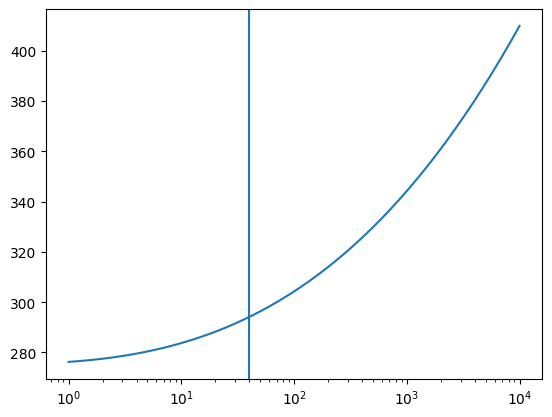

In [33]:
pco2 = np.logspace(0, 4)

T = cem.get_temperature_from_pco2(pco2)

plt.plot(pco2, T)
plt.xscale('log')
plt.axvline(40)

plt.show()